# Measuring Fractal Dimension by Box-Counting

## Theory
The term 'fractal dimension' was introduced by by Benoit Mandelbrot in 1967 to explain self-similarity of a pattern. A fractal dimension is defined as a ratio of the change in detail to the change in scale. It is used as an index that quantifies the complexity of a fractal pattern (https://en.wikipedia.org/wiki/Fractal_dimension). 

Famously, fractal dimension has been described in the context of the British coastline. A coastline's measured length was observed to change depending on the length of the measuring stick used. In 2-D and 3-D, this notion can be extended to the length of a measuring pixel or voxel, respectively. 


![image.png](attachment:image.png)
http://en.wikipedia.org/wiki/Image:Britain-fractal-coastline-combined.jpg 

### Box Counting Method
One way to determine fractal dimension of an image is through the box counting method. Measuring elements are laid over the image in a fixed grid pattern. As it scans over the grid, information is collected as to whether or not the measuring element is at the edge of the pattern. The number of measuring elements that are at the edge is then used to calculate the fractal dimension (https://en.wikipedia.org/wiki/Box_counting). 

## Mathematical Definition
The relationship of a pattern's fractal dimension and its measuring element can be expressed as:

$N	\propto \frac{1}{D^F}$

$F = \lim_{D \to 0} \frac{-log N(D)}{log(D)}$

* N: number of measuring elements
* D: size of measuring element
* F: fractal dimension

## Example
A Sierpinski carpet has a known fractal dimension of 1.8928. Performing the box counting method found its fractal dimension as approximately 1.8 ~ 1.9.

First, import the needed packages.


In [1]:
import matplotlib.pyplot as plt
import porespy as ps

Generate a sierpinski carpet and visualize.

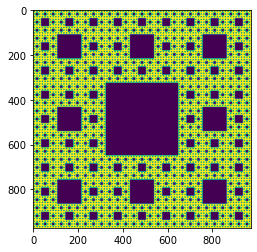

In [2]:
im = ps.generators.sierpinski_foam(4, 5)
plt.imshow(im)

Finally, apply the box count function and visualize.

In [3]:
data = ps.metrics.boxcount(im)

<function matplotlib.pyplot.show(close=None, block=None)>

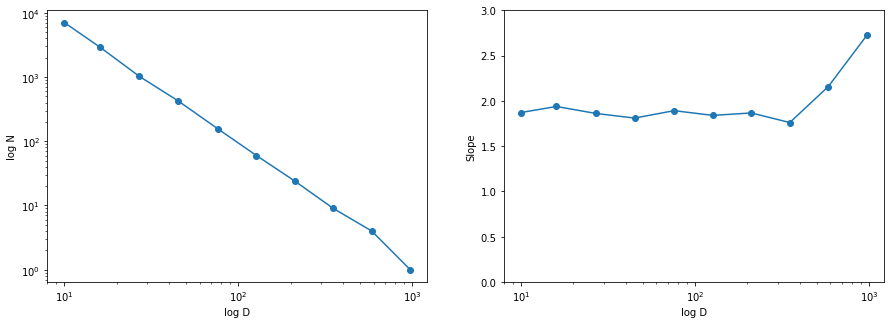

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('log D')
ax1.set_ylabel('log N')
ax2.set_xlabel('log D')
ax2.set_ylabel('Slope')
ax2.set_xscale('log')
ax1.plot(data.size, data.count,'-o')
ax2.plot(data.size,data.slope,'-o')
plt.ylim([0, 3])
plt.show 